# Matplotlib - Estadística

El objetivo del siguiente notebook es, además de repasar conceptos de estadística, que presten atención a cómo se calculan algunas cosas con Numpy y se hacen gráficos con Matplotlib


## Matplotlib

### Gráficos de funciones

Vamos a graficar una función lineal: $y = ax + b$

Importamos las librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#la siguiente linea no siempre es necesaria, pero mejor que este
%matplotlib inline 

Creamos el arreglo de $x$ sobre el cual calcularemos la función y definimos algunos parametros


In [3]:
x = np.linspace(-5,5,100)
a = 2 #pendiente
b = 1 #ordenada al origen

Ahora, aprovechando algunas propiedades de Numpy, calculamos $y$


In [4]:
y = a*x + b
#notar que tienen el mismo shape
print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (100,)
y shape: (100,)


Ahora graficamos! **NO** hay una única forma de graficar, ¡y esa es una de las ventajas de Matplotlib! Abajo dejamos una de las formas más sencillas y útiles de hacer un gráfico.

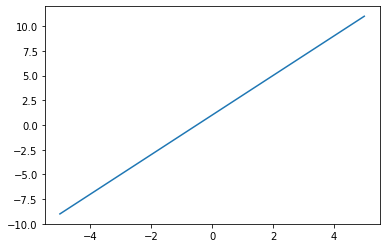

In [5]:
# plt.figure(figsize = (8,6))
plt.plot(x,y)
# plt.grid()   #crea una grilla
# plt.title('Grafico de una funcion lineal')
# plt.xlabel('Eje de las x')
# plt.ylabel('Eje de las y')
# plt.show()


## Histogramas

Para hacer histogramas, primero definimos las muestras que vamos a graficar.

In [6]:
muestras = np.array([2, 4, 2, 3, 5, 1, 1, 3, 2, 1, 0, 5, 1, 2, 2, 4, 3, 0, 2, 1, 0, 2,
       2, 0, 2, 2, 0, 5, 2, 1, 5, 1, 1, 3, 0, 1, 3, 1, 4, 2, 2, 1, 7, 1,
       2, 2, 3, 2, 5, 1, 1, 3, 3, 3, 3, 2, 0, 4, 0, 3, 0, 2, 4, 4, 1, 3,
       4, 1, 1, 2, 2, 4, 1, 3, 4, 1, 3, 1, 2, 4, 2, 2, 3, 4, 2, 0, 3, 3,
       2, 2, 1, 2, 0, 4, 1, 3, 2, 4, 3, 3])

Y ahora hacemos el histograma. Notar que las líneas de código son prácticamente las mismas que para hacer el gráfico de la función, salvo que en lugar de 
```python 
plt.plot()
``` 

usamos

```python
plt.hist()
```



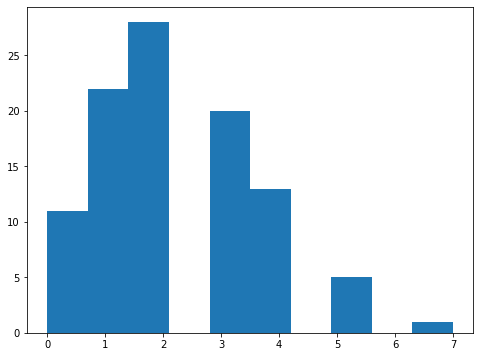

In [7]:
plt.figure(figsize = (8,6))
plt.hist(muestras)
# plt.grid()   #crea una grilla
# plt.title('Grafico de una funcion lineal')
# plt.xlabel('Eje de las x')
# plt.ylabel('Eje de las y')
plt.show()

### Ejercicios

Graficar las siguientes funciones:
1. $f(x) = x$
2. $f(x) = x^2$
3. $f(x) = ln(x)$    (logaritmo natural)

## Repaso Estadística

### Promedio
Dados $n$ números $x_1,x_2,...,x_n$, el promedio o media es 

$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n} x_i = \frac{x_1 + x_2 + ... + x_n}{n}$$

In [ ]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
n = len(x_s)

#forma lenta
x_mean = 0
for x in x_s:
    x_mean +=x
x_mean/=n
print(x_mean)

In [ ]:
#mas facil usando numpy
x_mean = np.mean(x_s)
print(x_mean)

**Comentarios**:
1. Dado un conjunto de números, el promedio suele ser considerado el número más representativo de ese conjunto. Esto NO siempre es así.
2. Al conjunto de números $x_1,...,x_n$ los pueden encontrar por el nombre de *población* o *muestra* (¡Ojo que no estamos diciendo que *población* y *muestra* sean lo mismo!).



### Desviación Estándar

La desviación estándar nos da una idea de cuán "dispersos" están los valores con respecto a su promedio. En general se usa la letra griega $\sigma$ para representarla

$$ \sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i -\overline{x})^2}{n - 1}}$$

A continuación generamos, gracias a herramientas que provee numpy, dos muestras de dos distribuciones normales, con el mismo promedio pero distinta desviación estándar.



In [ ]:
promedio = 2.0
std_1 = 5.0
std_2 = 2.0
muestras_1 = np.random.normal(loc = promedio, scale = std_1, size = 400)
muestras_2 = np.random.normal(loc = promedio, scale = std_2, size = 400)
sns.set()
plt.figure(figsize = (10,8))
plt.hist(muestras_1, bins = 20, alpha = 0.5)
plt.hist(muestras_2, bins = 20, alpha = 0.5)
plt.show()

Dada una muestra, Numpy también tiene herramientas para calcular la desviación estándar.

In [ ]:
#nuevamente, es facil calcularla con numpy
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
std = np.std(x_s)
print(std)

### Distribuciones de probabilidad

El concepto de distribución de probabilidad es un concepto central en probabilidad y estadística y, por lo tanto, hay mucho para decir.

Comencemos por un ejemplo: un dado de seis caras. La probabilidad de que al tirar el dado *salga* una cara es $1/6$. Si graficamos la probabilidad para cada resultado posible de tirar un dado, obtendríamos el siguiente gráfico:

In [ ]:
valores = np.arange(1,7)
probas = np.zeros(6) + 1/6
plt.bar(valores, probas)
plt.title('Distribución de probabilidad uniforme: lanzamiento de un dado')
plt.savefig('distribucion_dado.png', dpi = 400)
plt.show()

En este caso, decimos que la distribución de probabilidad es uniforme, ya que le asigna la misma probabilidad a cada valor que puede salir al tirar el dado.

**Detalles técnicos**:
1. El resultado de tirar un dado es un ejemplo de una *variable aleatoria*.
2. En el caso del dado, la variable aleatoria puede tomar valores *discretos* y *acotados* (limitados): 1, 2, 3, 4, 5 y 6
3. Existen variables aleatorias donde los posibles valores que puede tomar son continuos y no acotados. Veremos la distribución más famosa de ellas a continuación.

**Ejercicio**: graficar la distribución de probabilidad para el lanzamiento de una moneda.

#### Distribución Normal o Gaussiana

La distribución normal o gaussiana debe ser la distribución más famosa dentro de las distribuciones. Es una distribución de variable continua y aparece en una infinidad de ámbitos de la ciencia. Muchas variables asociadas a fenómenos naturales siguen una distribución gaussiana; un ejemplo típico es la estatura de las personas.

Recomendamos entrar en la página de Wikipedia y prestar atención a la sección "Propiedades":
https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal

## Estadística con Python/Numpy

Como vimos, en la librería Numpy ya hay funciones que calculan varios *estadìsticos* dada una muestra


In [ ]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
x_mean = np.mean(x_s) #alternativamente, x_s.mean()
std = np.std(x_s) #alternativamente, x_s.std()
print(x_mean, std)

También hay funciones que generan muestras al azar de una distribución

In [ ]:
promedio = 2.0
std = 5.0
muestras_normal = np.random.normal(loc = promedio, scale = std, size = 400)
print(muestras_normal[:10])

Con Matplotlib podemos hacer histogramas

In [ ]:
plt.hist(muestras_normal)
plt.show()

**Ejercicio**: explorar las siguientes funciones:
```python
np.mode(), np.percentile(), np.quantile()
```


### Ejercicio Integrador

Generar 100 muestras de una distribución normal de media $\mu$ y desviación estándar $\sigma$ que tomen los siguientes valores:
* $\mu = 2$, $\sigma = 0.5$
* $\mu = -2$, $\sigma = 0.5$
* $\mu = 4$, $\sigma = 10$
* $\mu = 8$, $\sigma = 10$

1 - ¿Cuál es el promedio de las muestras obtenidas?¿Coincide con $\mu$?

2 - Graficar el histograma de las muestras obtenidas, haciendo una figura para cada caso. ¿Sirve para compararlas?¿Se animan a superponer la distribución teórica en el gráfico?


Ayuda: 

from scipy import stats

x = np.linspace(-1,5, 1000)

y = stats.norm.pdf(x, mu, sigma)


3 - Graficar todos los histogramas en la misma figura.

### Para chusmear si tienen ganas.

Cómo Obtener muestras al azar de un dado (así hicimos los gráficos para la presentación)

Sin cargar

In [ ]:
sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,50,100,250,500,1000,10000]
resultados = np.array([])
for size in sizes:
    resultados_nuevos = np.random.choice([1,2,3,4,5,6], size = size - len(resultados))
    resultados = np.concatenate((resultados,resultados_nuevos))
    plt.figure()
    plt.hist(resultados, density = True, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5])
    plt.title(str(len(resultados)) + ' Muestras')
    plt.axhline(1/6,linestyle = '--', c = 'r')
#     plt.savefig('dados/muestras_' +str(len(resultados)) + '.png' , dpi = 400)

Cargado

In [ ]:
sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,50,100,250,500,1000,10000]
resultados = np.array([])
probs = np.array([1,1,1,1,1,2])
probs = probs/probs.sum()
print(probs)
    
for size in sizes:
    resultados_nuevos = np.random.choice([1,2,3,4,5,6], size = size - len(resultados), p = probs)
    resultados = np.concatenate((resultados,resultados_nuevos))
    plt.figure()
    plt.hist(resultados, density = True, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5])
    plt.title(str(len(resultados)) + ' Muestras')
    plt.axhline(1/6,linestyle = '--', c = 'r')
#     plt.savefig('dados/muestras_cargadas' +str(len(resultados)) + '.png' , dpi = 400)